In [1]:
%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt
import ternary
from matplotlib import gridspec
import numpy as np
import matplotlib as mpl
# magnetization=np.load('magnetization2.npy') #total magnetization
magnetization = np.load('mag_per_mag_atom.npy')
maximum_mag = np.load("maximum_mag.npy", allow_pickle=True)
test_labels = np.load("test_labels.npy", allow_pickle=True)
# eps = 1e-6
# magnetization = np.log(magnetization + eps)
vector=np.load('vector2.npy')  #output vector in ternary form
# atomnumber=np.load('atomnumber.npy') #atom number
# magnetization=magnetization/atomnumber  #magnetization per atom

Text(0.5, 0, 'Maximum magnetic moment')

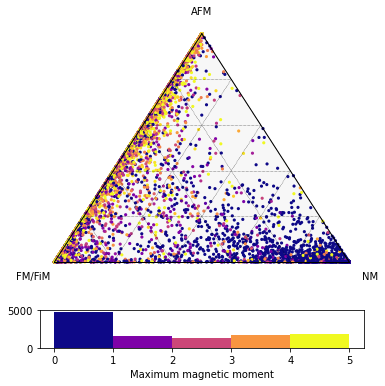

In [2]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=4
vmin=0

sc=tax.scatter(vector, s=10, edgecolors='none',c=maximum_mag, cmap=cmap, 
               vmin=vmin,vmax=vmax)
# tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag, bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Maximum magnetic moment')
    


In [3]:
cm(256)

(0.940015, 0.975158, 0.131326, 1.0)

In [4]:
thresh = 0.001
less_mag = (maximum_mag <= thresh).nonzero()[0]
more_mag = (maximum_mag > thresh).nonzero()[0]

In [5]:
maximum_mag.shape

(11393,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Maximum magnetic moment')

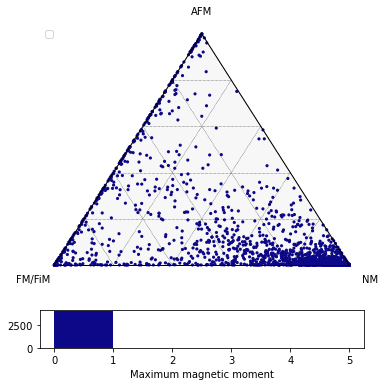

In [6]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=4
vmin=0

sc=tax.scatter(vector[less_mag], s=10, edgecolors='none',c=maximum_mag[less_mag], cmap=cmap, 
               vmin=vmin,vmax=vmax)
tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag[less_mag], bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Maximum magnetic moment')

Text(0.5, 0, 'Maximum atomic magnetic moment')

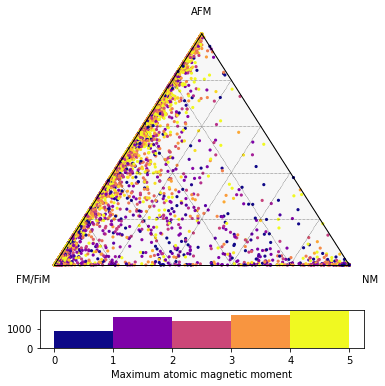

In [7]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=4
vmin=0

sc=tax.scatter(vector[more_mag], s=10, edgecolors='none',c=maximum_mag[more_mag], cmap=cmap, 
               vmin=vmin,vmax=vmax)
# tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag[more_mag], bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Maximum atomic magnetic moment')

In [8]:
print(less_mag.shape), print(more_mag.shape)

(3932,)
(7461,)


(None, None)

In [9]:
d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[less_mag]:
    d[i] += 1
    
print(d)

d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[more_mag]:
    d[i] += 1
    
print(d)

{'FM': 161, 'FiM': 3, 'NM': 3733, 'AFM': 35}
{'FM': 1968, 'FiM': 2002, 'NM': 0, 'AFM': 3491}


In [10]:
less_mag.shape

(3932,)

In [11]:
pred_label = []
order_label = ['NM', 'AFM', 'FM/FiM']
for v in vector:
    pred_label.append(order_label[np.argmax(v)])
pred_label = np.array(pred_label)
    
d = {'FM/FiM': 0, 'NM': 0, 'AFM': 0}
for i in pred_label[less_mag]:
    d[i] += 1
    
print(d)

d = {'FM/FiM': 0, 'NM': 0, 'AFM': 0}
for i in pred_label[more_mag]:
    d[i] += 1
    
print(d)

{'FM/FiM': 391, 'NM': 3373, 'AFM': 168}
{'FM/FiM': 3744, 'NM': 483, 'AFM': 3234}
